Polynomial linear regression is a model that assesses the relationship between a dependent variable and an independent variable. The polynomial model is expressed using the following equation:

![](https://www.maplesoft.com/view.aspx?SI=4845/PolyReg.htm_5.gif)


According the Least Square Method, the Regresion Polynomials of second degree is given by: 


![](https://www.maplesoft.com/view.aspx?SI=4845/PolyReg.htm_21.gif)

 Then coefficients are derived from the derivative of the equation formed by subtracting the function from the measured real value.

 
 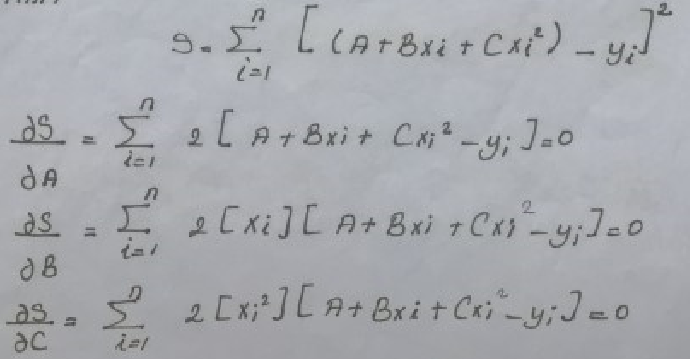
 
Then we get the result from these equations:

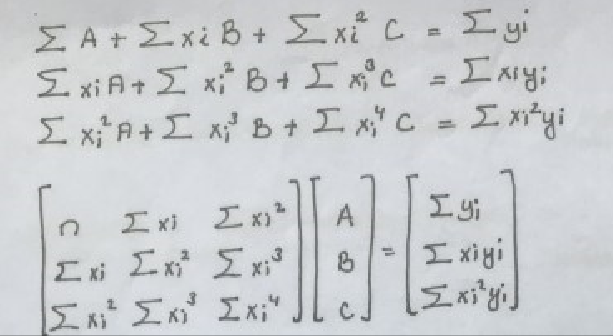

Below I have set an algorithm to calculate the matrix above.






In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Reading the data and choosing essential features.

In [ ]:

data = pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")
#optianal : country = input("please enter the name of country you want to predict : ")
country = "Turkey"
data = data.loc[data["Country/Region"] == country]
data = data["Confirmed"]

data = data.loc[data > 0]
data.head()

We need to storage x and y values in lists because algoritm needs them as a list.

In [ ]:
X_train = []
Y_train = []
for i in range(len(data)):
    Y_train.append(data.iloc[i])
    X_train.append(i+1)


As we see above we need to calculate the determinant of matrix and the code below works for that.

In [ ]:
def det(l):
    n=len(l)
    if (n>2):
        i=1
        t=0
        sum=0
        while t<=n-1:
            d={}
            t1=1
            while t1<=n-1:
                m=0
                d[t1]=[]
                while m<=n-1:
                    if (m==t):
                        u=0
                    else:
                        d[t1].append(l[t1][m])
                    m+=1
                t1+=1
            l1=[d[x] for x in d]
            sum=sum+i*(l[0][t])*(det(l1))
            i=i*(-1)
            t+=1
        return sum
    else:
        return (l[0][0]*l[1][1]-l[0][1]*l[1][0])

The Polynomial Regression algorithm.

In [ ]:
train_sample_number = len(data)


#optional : degree = int(input("polinom derecesi : "))
degree = 3
matris = np.full((degree+1,degree+1),0).astype("float")

for i in range(degree+1):

    for j in range(degree+1):

        sum_x = 0
        for k in range(train_sample_number):
            sum_x += X_train[k]**(i+j)
        matris[i][j] = sum_x


sonuc = []
for i in range(degree+1):
    sum = 0
    for j in range(train_sample_number):
        sum = sum +  (Y_train[j]*(X_train[j]**i))
    sonuc.append(sum)

array = np.array(sonuc)
array.reshape(-1,1)

delta = det(matris)
dete = []

x = np.full((degree+1,degree+1),0).astype("float")

for i in range(degree+1):
    for j in range(degree+1):
        for k in range(degree+1):
            x[j][k] = matris[j][k]
    for j in range(degree+1):
        x[j][i] = array[j]
    
    dete.append(det(x)/delta)

#optional : prediction = float(input("tahmin edilecek değer : "))
prediction = len(data) + 1
sonuc = 0
for i in range(degree+1):
    sonuc = sonuc + dete[i]*(prediction**i)

print(round(sonuc))
